# Analyzing Crimes in Los Angeles

## Problem Statement
#####  The aim of this project is to discover and analyze the crime rates in Los Angeles by identifying the patterns and trends given in the dataset. This analysis will provide important insights into criminal activity in various neighborhoods .

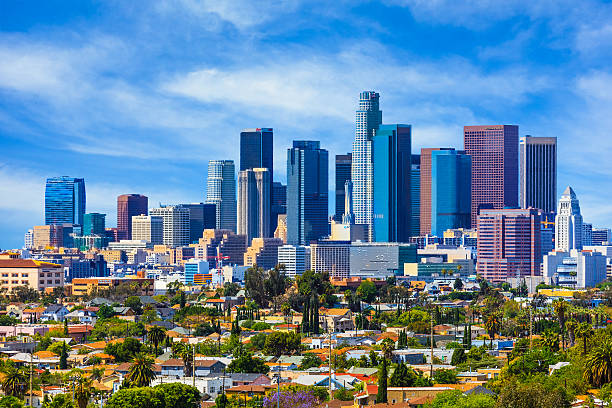

## Data Description
 The following is the description related to columns ;
- 'DR_NO': Division of Records Number - Official file number composed of a 2-digit year, area ID, and 5 digits.
- 'Date Rptd': Date Reported - The date the crime was reported, formatted as MM/DD/YYYY.
- 'DATE OCC': Date of Occurrence - The date the crime occurred, formatted as MM/DD/YYYY.
- 'TIME OCC': Time of Occurrence - The time the crime occurred, in 24-hour military time format.
- 'AREA NAME': Area Name - The name of the geographic area or patrol division responsible for the location, often named after a landmark or surrounding community (e.g., 77th Street Division serves neighborhoods in South Los Angeles).
- 'Crm Cd Desc': Crime Code Description - Description of the crime committed.
- 'Vict Age': Victim's Age - The age of the victim, in years.
- 'Vict Sex': Victim's Sex - The sex of the victim: F for Female, M for Male, X for Unknown.
- 'Vict Descent': Victim's Descent - The descent or ethnic background of the victim, categorized as:
A: Other Asian
B: Black
C: Chinese
D: Cambodian
F: Filipino
G: Guamanian
H: Hispanic/Latin/Mexican
I: American Indian/Alaskan Native
J: Japanese
K: Korean
L: Laotian
O: Other
P: Pacific Islander
S: Samoan
U: Hawaiian
V: Vietnamese
W: White
X: Unknown
Z: Asian Indian
- 'Weapon Desc': Weapon Description - A description of the weapon used, if applicable.
- 'Status Desc': Status Description - The status of the crime (e.g., under investigation, closed).
- 'LOCATION': Location - The street address where the crime occurred.

## Importing necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
#reading the dataset 
df=pd.read_csv("D:/crimes.csv",parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

In [3]:
#displaying the first few rows of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
#displaying the last few rows of the dataset
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,0900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,NaN,Invest Cont,14500 HARTLAND ST


In [5]:
#Displaying the total rows and column in the dataset
print("The total rows and columns in this dataset are : ",df.shape)

The total rows and columns in this dataset are :  (185715, 12)


In [6]:
#Displaying the column names of crime dataset
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

## Data Cleaning

In [7]:
# Changing the column names to lowercase to maintain consistency
df.columns=df.columns.str.lower()
df.head()

,dr_no,date rptd,date occ,time occ,area name,crm cd desc,vict age,vict sex,vict descent,weapon desc,status desc,location
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [8]:
#changing the column names to make it easy to understand
df=df.rename(columns={"date rptd":"date reported","date occ":"date occurred","time occ":"time occurred","crm cd desc":"crime committed","status desc":"crime status"})
df.head(2)

,dr_no,date reported,date occurred,time occurred,area name,crime committed,vict age,vict sex,vict descent,weapon desc,crime status,location
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST


In [9]:
#checking the data types of each columns
df.dtypes

dr_no                       int64
date reported      datetime64[ns]
date occurred      datetime64[ns]
time occurred              object
area name                  object
crime committed            object
vict age                    int64
vict sex                   object
vict descent               object
weapon desc                object
crime status               object
location                   object
dtype: object

#### Datatype of all columns are consistent except the time occurred .

In [10]:
#Extracting first two characters of time occurred column  to make new column and also changing its data type
df["hour occurred"]=df["time occurred"].str[:2].astype("int64")
#Changing the data type of time occurred column
df["time occurred"]=df["time occurred"].astype("int64")
df.head()

,dr_no,date reported,date occurred,time occurred,area name,crime committed,vict age,vict sex,vict descent,weapon desc,crime status,location,hour occurred
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [11]:
#Verifying the data type is changed
assert df["hour occurred"].dtype=="int64", "The 'hour occurred' column has invalid datatype."
assert df["time occurred"].dtype=="int64", "The 'time occurred' column has invalid datatype."

In [12]:
#check for duplicated rows
duplicated_rows=df.duplicated().sum()
print("The number of duplicated rows are:",duplicated_rows)

The number of duplicated rows are: 0


#### There are no duplicates in the dataset.

In [13]:
#checking for the missing values
missing_values=df.isna().sum()
print(missing_values)

dr_no                   0
date reported           0
date occurred           0
time occurred           0
area name               0
crime committed         0
vict age                0
vict sex               11
vict descent           10
weapon desc        112213
crime status            0
location                0
hour occurred           0
dtype: int64


#### There are missing values in the dataset,the column vict sex,vict descent and weapon desc contain missing values in the dataset.

In [14]:
#checking the percentage of the missing values
missing_values_percentage=missing_values*100/len(df)
print(missing_values_percentage)

dr_no               0.000000
date reported       0.000000
date occurred       0.000000
time occurred       0.000000
area name           0.000000
crime committed     0.000000
vict age            0.000000
vict sex            0.005923
vict descent        0.005385
weapon desc        60.422152
crime status        0.000000
location            0.000000
hour occurred       0.000000
dtype: float64


<Axes: >

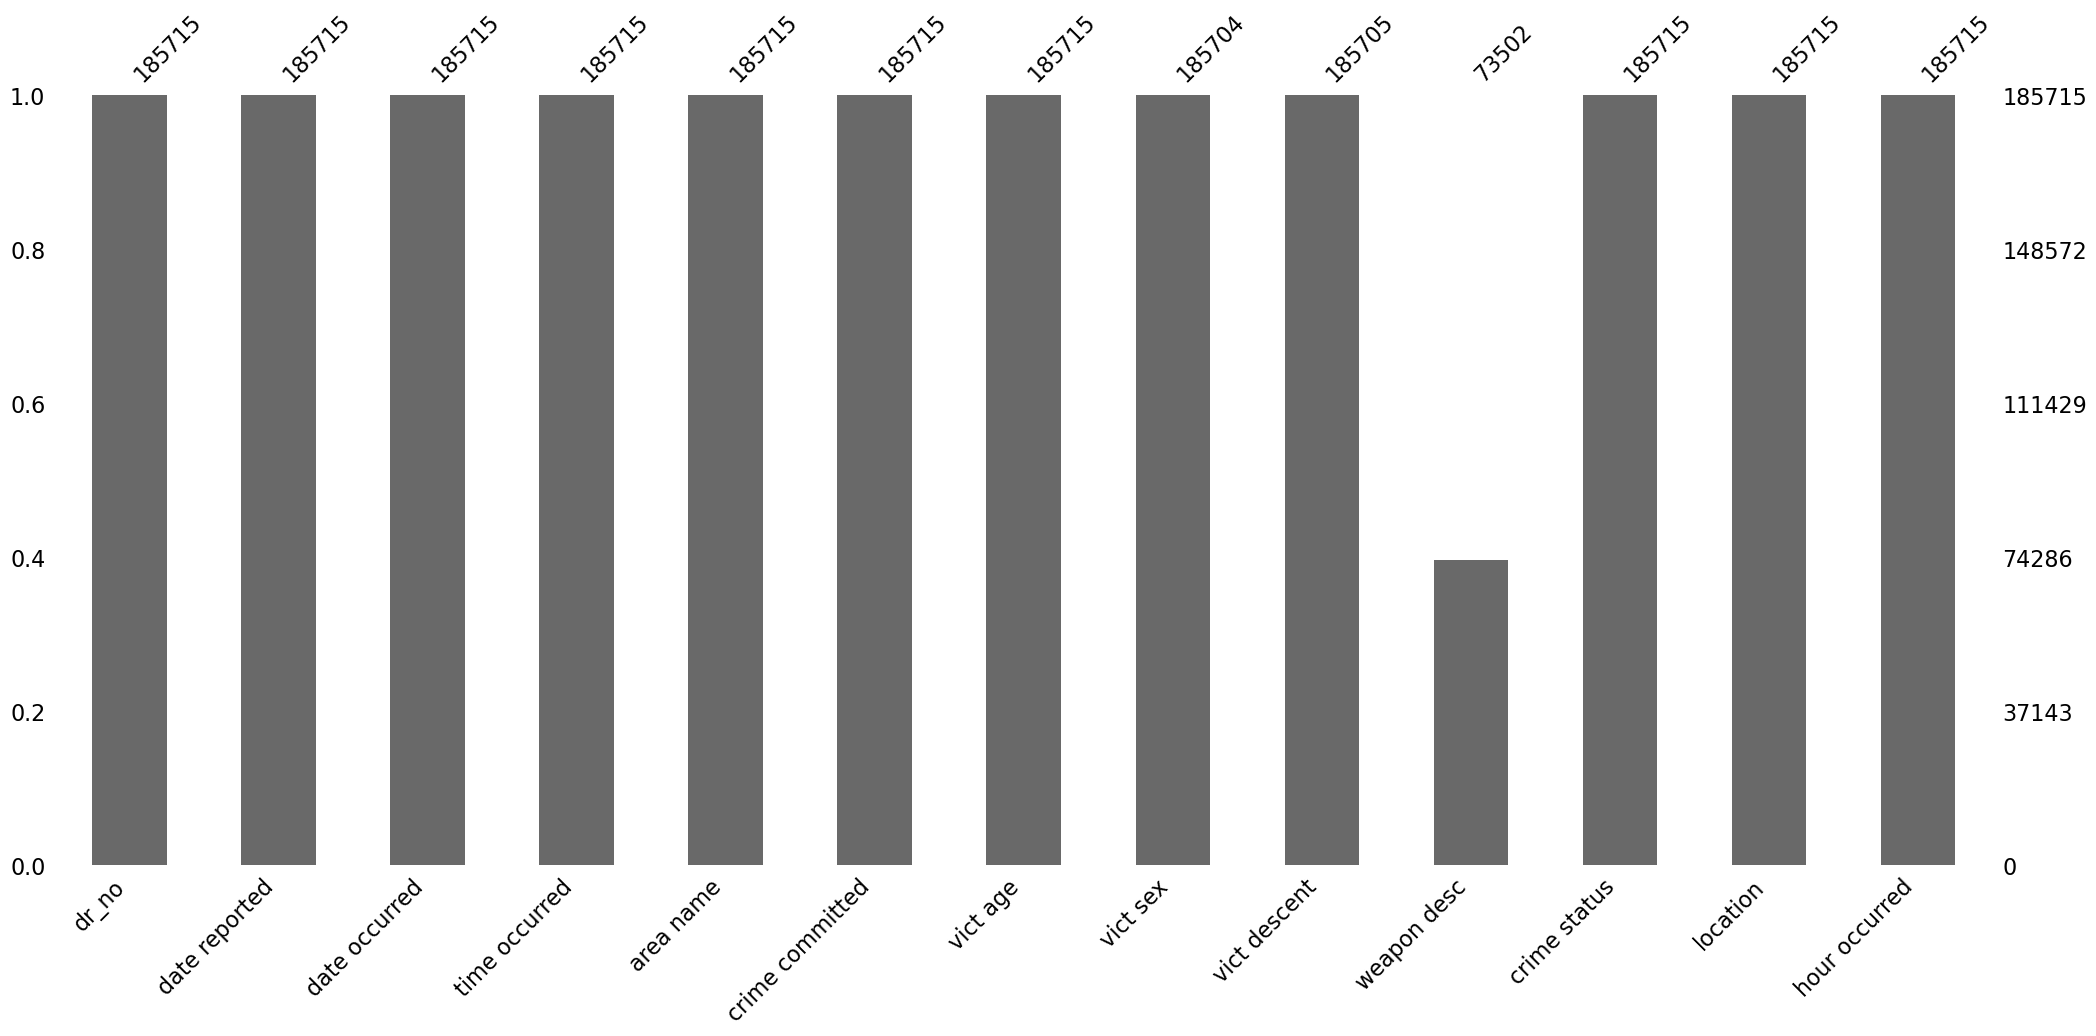

In [15]:
#visualizing missing values to gather insights or relations
import missingno as msno 
msno.bar(df)

<Axes: >

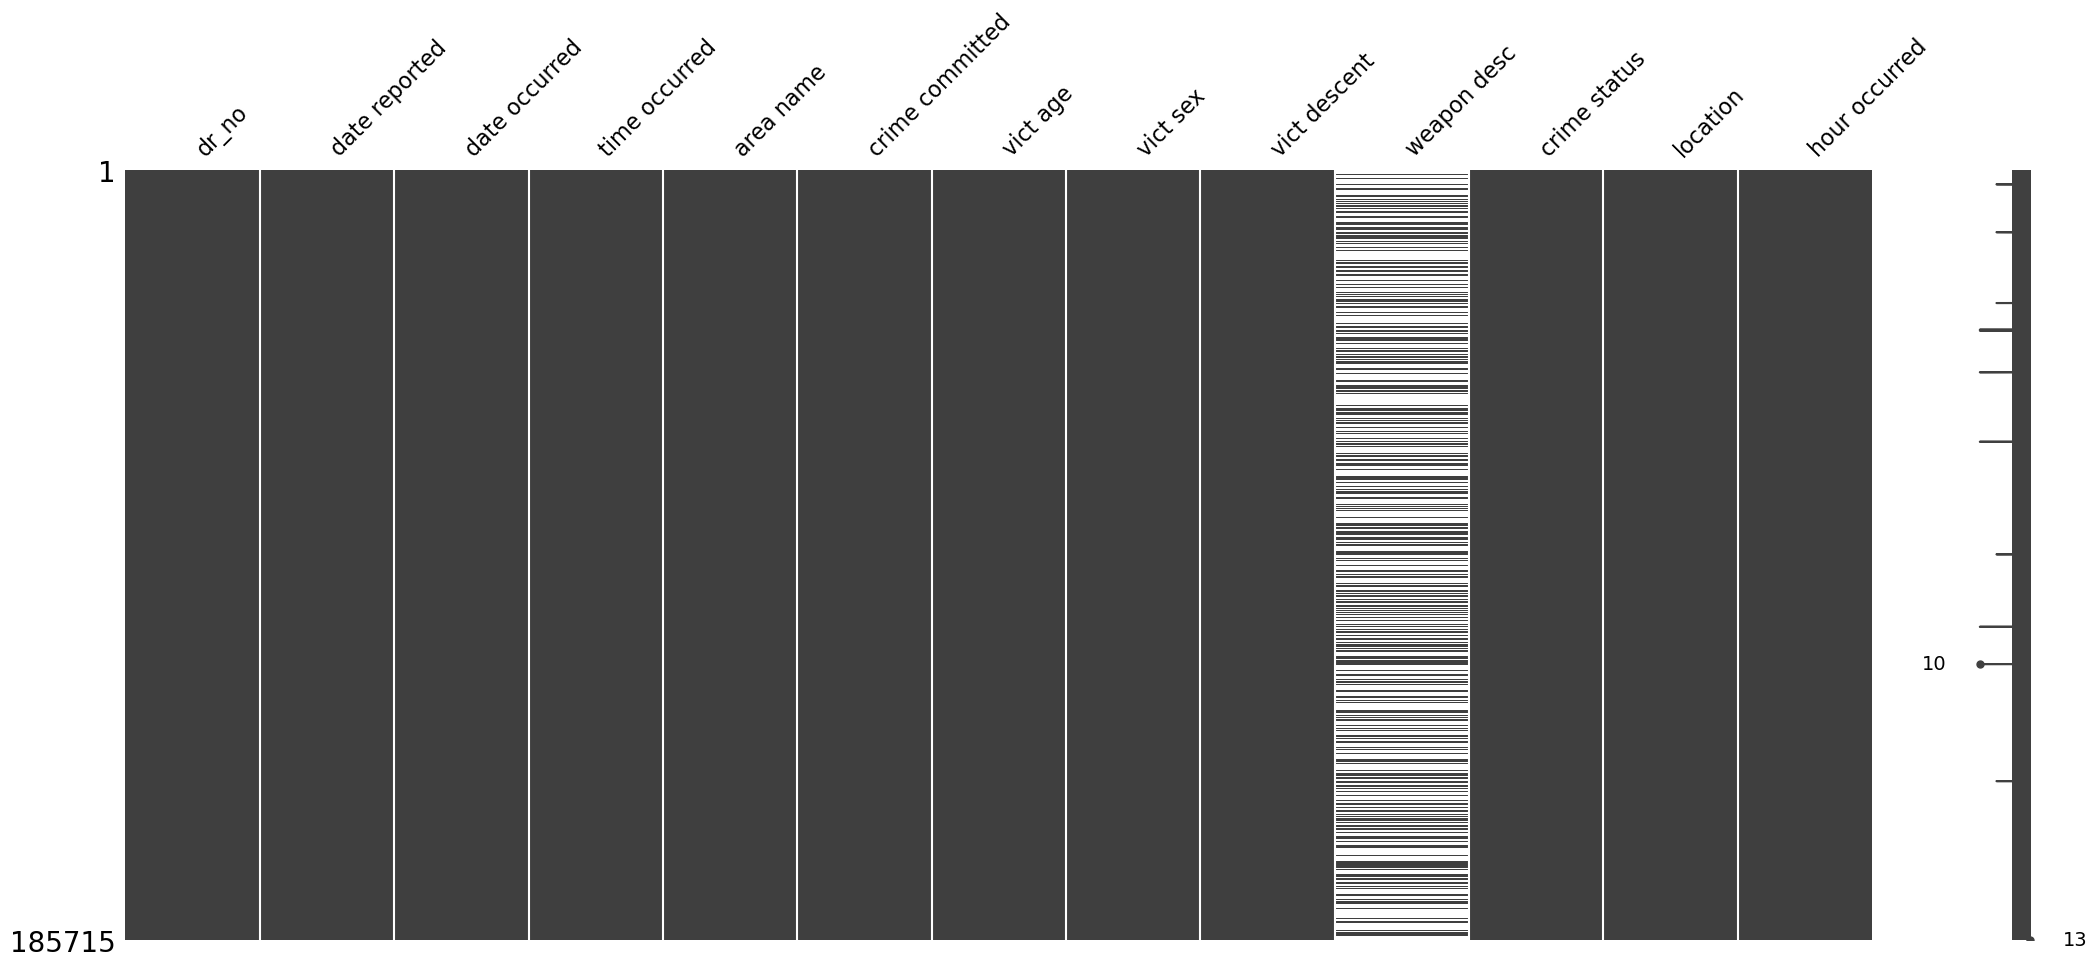

In [16]:
msno.matrix(df)

In [17]:
# Filling the missing values
df["weapon desc"]=df["weapon desc"].fillna("Unknown")
df["vict sex"]=df["vict sex"].fillna("X")
df["vict descent"]=df["vict descent"].fillna("X")

df.head()

,dr_no,date reported,date occurred,time occurred,area name,crime committed,vict age,vict sex,vict descent,weapon desc,crime status,location,hour occurred
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,Unknown,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,Unknown,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,Unknown,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,Unknown,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,Unknown,Invest Cont,1200 W 7TH ST,9


#### Instead of imputing the missing values column with most frequent observation, i  have filled  the missing values with the word ' unknown'  to avoid distorting the analysis .

In [18]:
#remvoing unnecessary columns
df=df.drop(columns=["dr_no"])
df.head(2)

,date reported,date occurred,time occurred,area name,crime committed,vict age,vict sex,vict descent,weapon desc,crime status,location,hour occurred
0,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,Unknown,Invest Cont,2500 S SYCAMORE AV,11
1,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,Unknown,Invest Cont,3300 SAN MARINO ST,16


#### Dropping the dr_no column as it doesnt give any meaningful insights

In [19]:
#displaying statistics for categorical columns
cat_cols=df.select_dtypes(include="object").columns
df[cat_cols].describe()

,area name,crime committed,vict sex,vict descent,weapon desc,crime status,location
count,185715,185715,185715,185715,185715,185715,185715
unique,21,104,4,20,75,6,39286
top,Central,THEFT OF IDENTITY,M,H,Unknown,Invest Cont,600 S BROADWAY
freq,14944,22670,93008,74128,112213,153790,358


In [20]:
#displaying statistics for numerical columns
num_cols=df.select_dtypes(include=np.number).columns
df[num_cols].describe()

,time occurred,vict age,hour occurred
count,185715.000000,185715.000000,185715.000000
mean,1300.024414,39.999257,12.813079
std,655.753163,15.450227,6.551456
min,1.000000,2.000000,0.000000
25%,830.000000,28.000000,8.000000
50%,1340.000000,37.000000,13.000000
75%,1830.000000,50.000000,18.000000
max,2359.000000,99.000000,23.000000


In [21]:
#checking for garbage values
print("============================")
for cols in df.select_dtypes(include="object").columns:
    print(df[cols].value_counts())
    print("=============================")

area name
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64
crime committed
THEFT OF IDENTITY                                     22670
BATTERY - SIMPLE ASSAULT                              19694
BURGLARY FROM VEHICLE                                 13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        13215
INTIMATE PARTNER - SIMPLE ASSAULT                     11981
                                                      ...  
BRIBERY                                                   1
GRAND THEFT / INSURANCE FRAUD                             1
DISRUPT SCHOOL             

In [22]:
# now verifying the the data 
try:
    if not df["vict sex"].isin(["M", "F", "X"]).all():
        raise ValueError("The 'vict sex' column contains invalid categories.")
except ValueError as t:
    print(t)

The 'vict sex' column contains invalid categories.


In [23]:
#checking the values for the column
df["vict sex"].value_counts()

vict sex
M    93008
F    89854
X     2823
H       30
Name: count, dtype: int64

In [24]:
# H value is not defined in the dataset and X means unknown so replacing the h with x
df["vict sex"]=df["vict sex"].str.replace("H","X")


In [25]:
#Again verifying victim sex column 
assert df["vict sex"].isin(["M", "F", "X"]).all(), "The 'vict sex' column contains invalid categories."

In [26]:
# Now verifying the victim descent column
unique_values=['B', 'H', 'W', 'O', 'C', 'K', 'V', 'X', 'A', 'F', 'J', 'P', 'I', 'S', 'Z', 'U', 'L', 'G', 'D']
try:
    if not df["vict descent"].isin(unique_values).all():
        raise ValueError("The 'vict descent' column contains invalid categories.")
except ValueError as t:
    print(t)

The 'vict descent' column contains invalid categories.


In [27]:
#checking the values for the column
df["vict descent"].value_counts()

vict descent
H    74128
W    44985
B    34931
O    16331
A     5519
X     4558
K     1389
F     1228
C     1210
J      433
V      327
I      322
Z      145
P       83
U       54
D       21
L       20
S       16
G       14
-        1
Name: count, dtype: int64

In [28]:
# - value is not defined in the dataset and X means unknown so replacing the - with x
df["vict descent"]=df["vict descent"].str.replace("-","X")


In [29]:
assert df["vict descent"].isin(unique_values).all(), "The 'vict descent' column contains invalid categories."

## Exploratory Data Analysis

In [30]:
#setting style and context 
sns.set_style("darkgrid")
sns.set_context("notebook",font_scale=1.5)

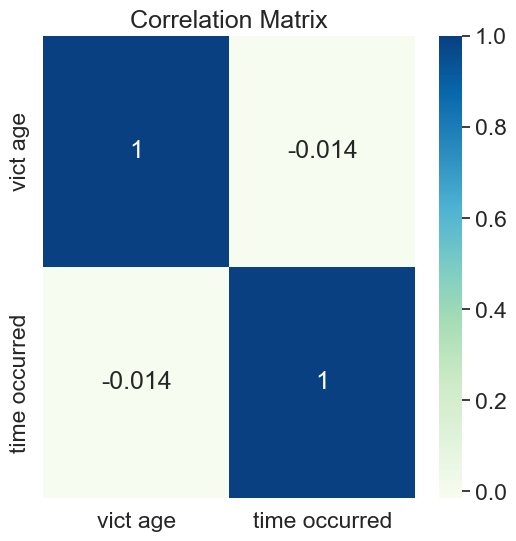

In [31]:
#displaying the correlation matrix
num_cols=["vict age","time occurred"]
plt.figure(figsize=(6,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='GnBu')
plt.title("Correlation Matrix")
plt.show()

### Insights
- The victim age and the time occured has a negative weak relationship.

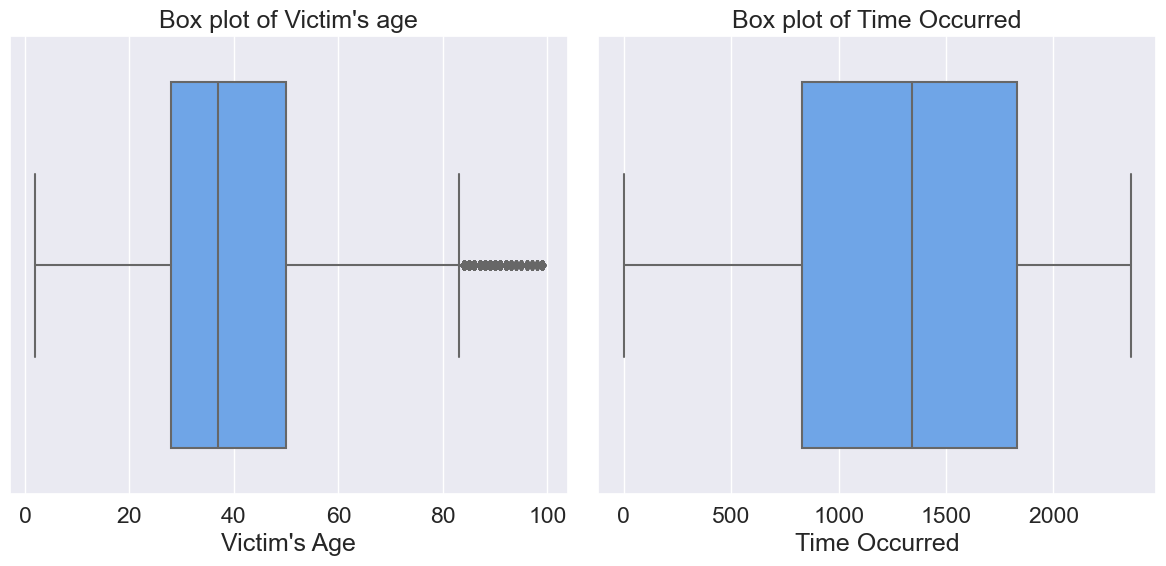

In [32]:
fig,axes =plt.subplots(1,2,figsize=(12,6))

#plot for victim's age
sns.boxplot(ax=axes[0],x="vict age",data=df,color='#5ba3fb')
axes[0].set_title("Box plot of Victim's age")
axes[0].set_xlabel("Victim's Age")

#plot for time occurred
sns.boxplot(ax=axes[1],x="time occurred",data=df,color='#5ba3fb')
axes[1].set_title("Box plot of Time Occurred")
axes[1].set_xlabel("Time Occurred")

plt.tight_layout()
plt.show()

#### Insights
- The median for victim's age is around 38.
- The median for time occured is around 1300.
- There are several outliers in victim age after 80 while there are no outliers for time occured.

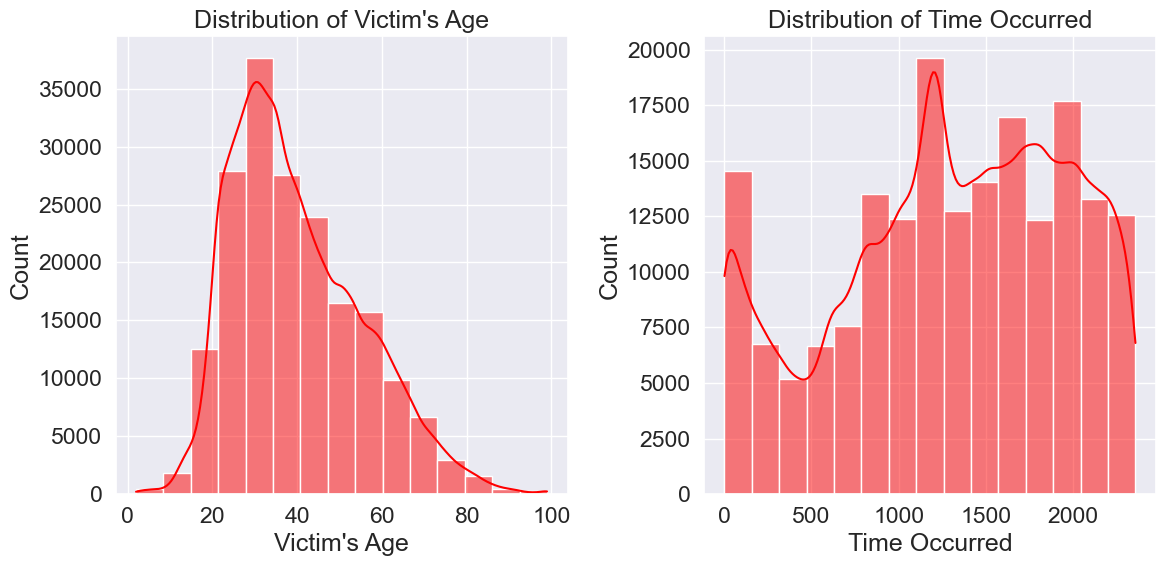

In [33]:
fig,axes =plt.subplots(1,2,figsize=(12,6))

#plot for victim's age
sns.histplot(ax=axes[0],x="vict age",data=df,bins=15,kde=True,alpha=0.5,color='#FF0000')
axes[0].set_title("Distribution of Victim's Age")
axes[0].set_xlabel("Victim's Age")

#plot for time occurred
sns.histplot(ax=axes[1],x="time occurred",data=df,bins=15,kde=True,alpha=0.5,color='#FF0000')
axes[1].set_title("Distribution of Time Occurred")
axes[1].set_xlabel("Time Occurred")

plt.tight_layout()
plt.show()

#### Insights
- The histogram reveals that crimes against individuals who are 20-40 year old is more common.
- The crime rate decreases as the age increases.
- The peak hour of crime is between 10 am to 3pm .


### Which hour has the highest frequency of crimes?

In [34]:
peak_crime_hour=df["hour occurred"].value_counts().nlargest(1)
print(peak_crime_hour)

hour occurred
12    13663
Name: count, dtype: int64


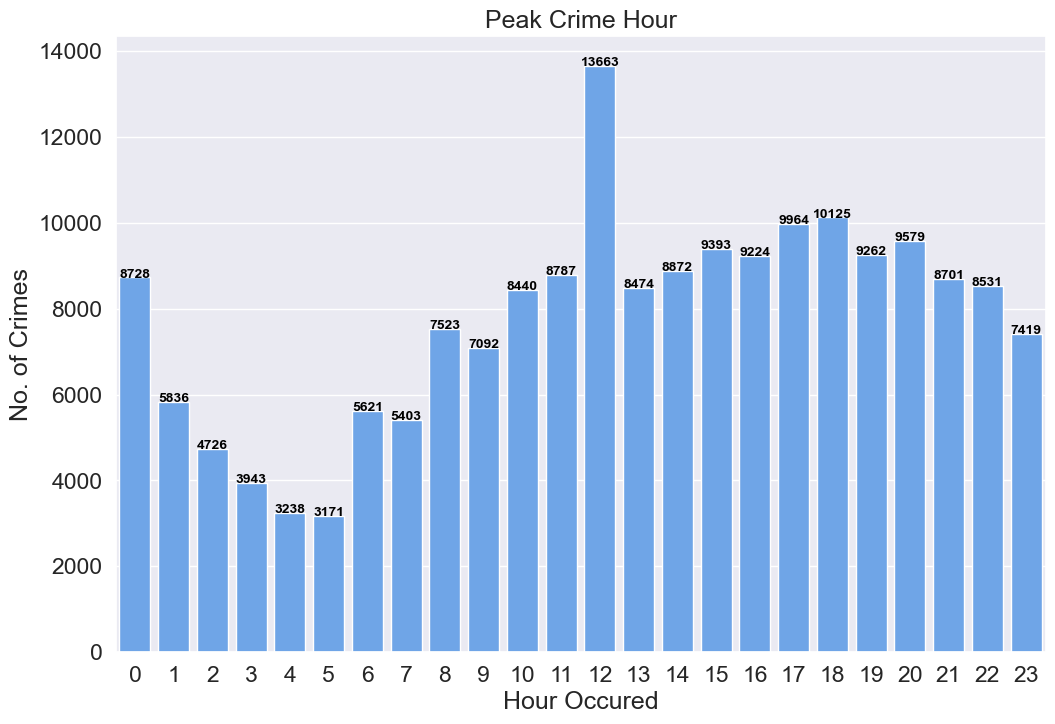

In [35]:
hour_counts = df["hour occurred"].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(x="hour occurred",data=df,color='#5ba3fb')

for i,v in hour_counts.items():
    plt.text(i, v, s=v, ha='center', fontsize=10, color='black',fontweight="bold")
    
plt.title("Peak Crime Hour")
plt.xlabel("Hour Occured")
plt.ylabel("No. of Crimes")
plt.show()

### Insights
- The peak crime hour is at 12 am and it is followed by 6pm.
- The crime rate at 5 am is the lowest.

### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [36]:
night_hours=[22,23,0,1,2,3]
night_crime=df[df["hour occurred"].isin(night_hours)]
peak_night_time_location=night_crime["area name"].value_counts().nlargest(1)
print(peak_night_time_location)

area name
Central    3312
Name: count, dtype: int64


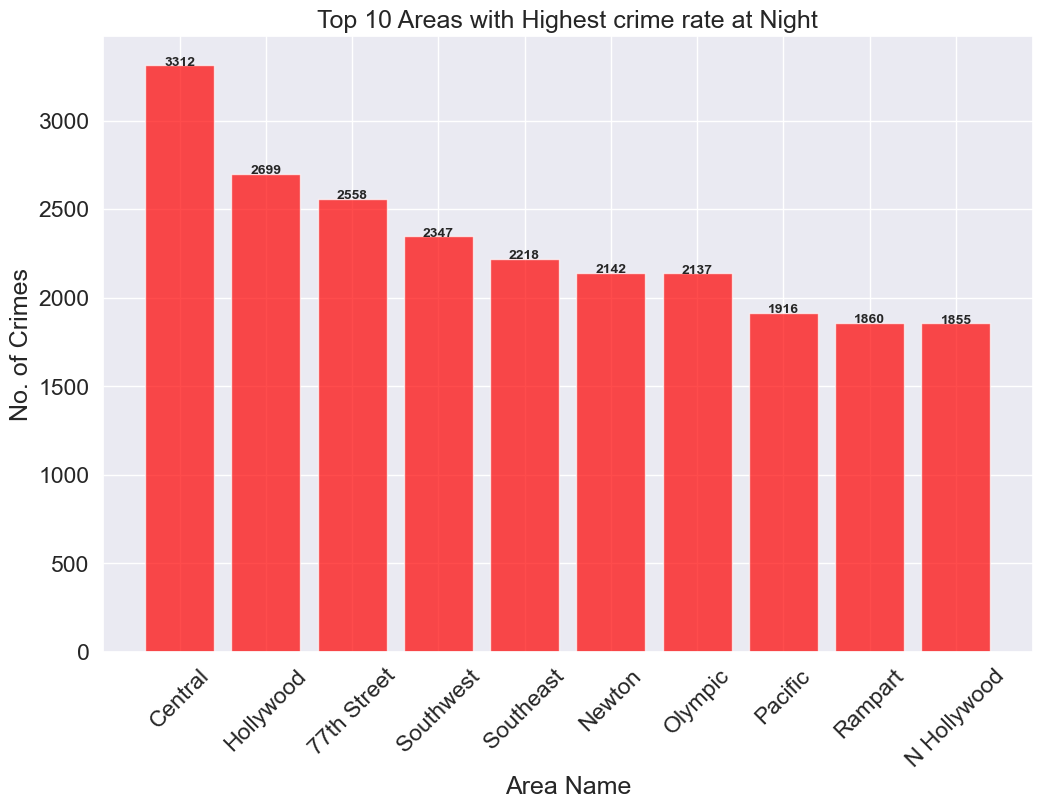

In [37]:
top_10_area = night_crime["area name"].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_area.index,top_10_area.values,alpha=0.7,color='#FF0000')

for i,v in enumerate(top_10_area):
    plt.text(i,v,s=str(v),ha="center",fontsize=10,fontweight="bold")
plt.title('Top 10 Areas with Highest crime rate at Night')
plt.xlabel('Area Name')
plt.ylabel('No. of Crimes')
plt.xticks(rotation=45)
plt.show()

### Insights
- The area with the highest crime rate at night  is central.
- The crime rates in Hollywood and 77th Street are also quite high.

### Display number of crimes committed against victims by age group.

In [38]:
# Define age group ranges and corresponding labels
group_ranges = [0, 17, 25,34,44, 54, 64, np.inf]  
group_names = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column 'AGE RANGES' based on the age group ranges
df["age ranges"] = pd.cut(df["vict age"], bins=group_ranges, labels=group_names)

df.head()

,date reported,date occurred,time occurred,area name,crime committed,vict age,vict sex,vict descent,weapon desc,crime status,location,hour occurred,age ranges
0,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,Unknown,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,Unknown,Invest Cont,3300 SAN MARINO ST,16,55-64
2,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,Unknown,Invest Cont,1900 TRANSIENT,12,26-34
3,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,Unknown,Invest Cont,6200 4TH AV,6,35-44
4,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,Unknown,Invest Cont,1200 W 7TH ST,9,65+


In [39]:
victim_ages = df["age ranges"].value_counts()
print(victim_ages)

age ranges
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


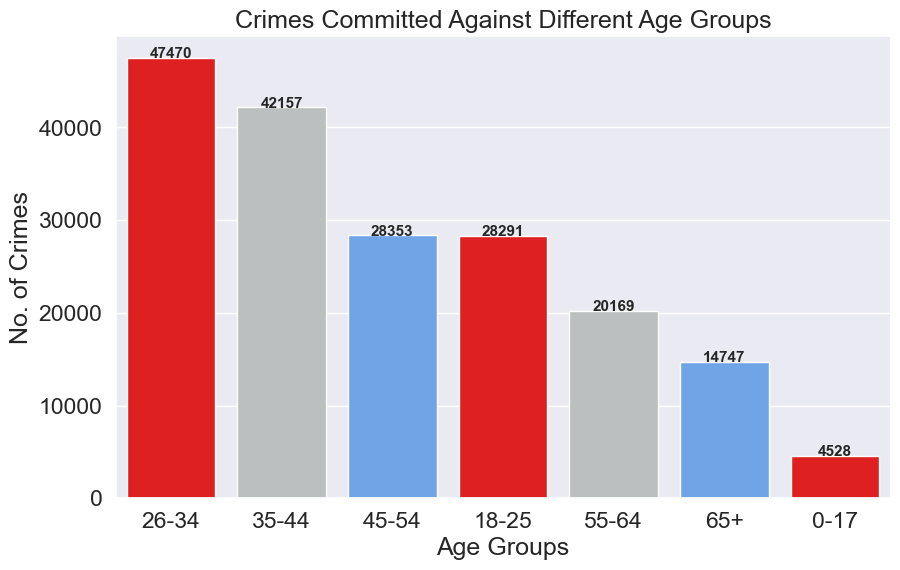

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values,order=victim_ages.index,palette=['#FF0000','#bcbfbf', '#5ba3fb'])
for i,v in enumerate(victim_ages):
    plt.text(i,v,s=str(v),ha="center",fontsize=11,fontweight="bold")
plt.title("Crimes Committed Against Different Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("No. of Crimes")
plt.show()

### Insights
- The crimes against the age group 26-34 is quite common.
- The crimes against the babies and teenagers is quite low.
- The crimes against the older people is less than those that are adults.

### How many crimes have been reported against each gender?

In [41]:
gender_counts=df['vict sex'].value_counts()

print(f'Crimes Reported against Gender are : \n{gender_counts}')

Crimes Reported against Gender are : 
vict sex
M    93008
F    89854
X     2853
Name: count, dtype: int64


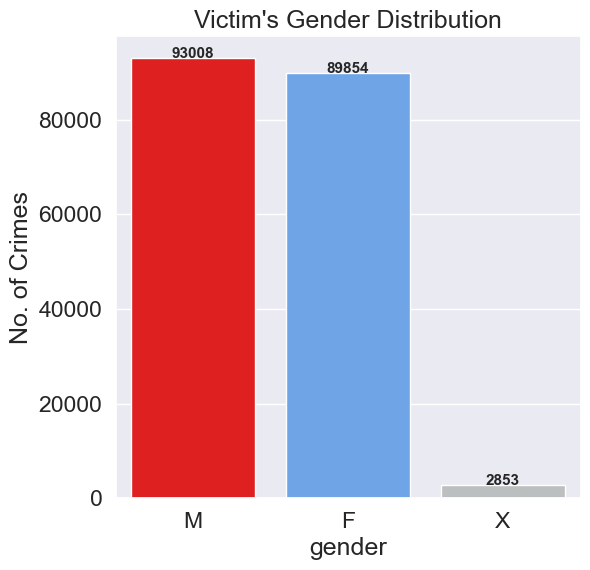

In [42]:
#plot for crimes against gender
plt.figure(figsize=(6,6))
sns.countplot(x="vict sex",data=df,order=gender_counts.index,palette=['#FF0000','#5ba3fb','#bcbfbf'])

for i,v in enumerate(gender_counts):
    plt.text(i,v,s=str(v),ha="center",fontsize=11,fontweight="bold")
    
plt.title("Victim's Gender Distribution")
plt.xlabel("gender")
plt.ylabel("No. of Crimes")
plt.show()

### Insights
- Crimes against males are more common than against females.
- About 1.5% of the victims gender is not known.

### Display Top 3 Crimes Committed 

In [43]:
#finding out the top 3 crimes
top_3_crimes=df["crime committed"].value_counts().nlargest(3)

print(f'Top 3 crime committed are :\n{top_3_crimes}')

Top 3 crime committed are :
crime committed
THEFT OF IDENTITY           22670
BATTERY - SIMPLE ASSAULT    19694
BURGLARY FROM VEHICLE       13799
Name: count, dtype: int64


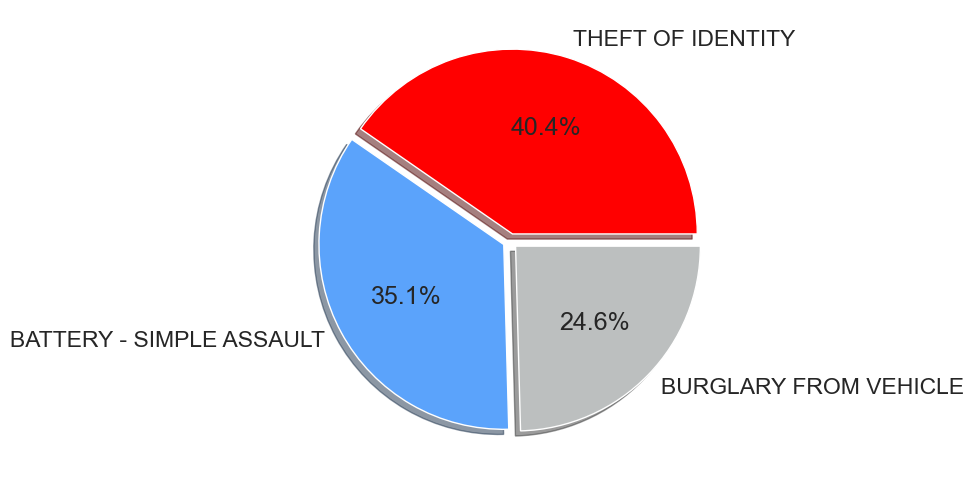

In [44]:
#plot for crime committed
plt.figure(figsize=(6,6))
plt.pie(x=top_3_crimes,labels=top_3_crimes.index,autopct="%1.1f%%", labeldistance=1.1,shadow=True,explode=[0.04,0.04,0.04],colors=['#FF0000','#5ba3fb','#bcbfbf'] )
plt.show()

### Insights
- The most frequent crime is identity theft, with a percentage of 40.4%.
- Crimes like simple assault and burglary of vehicles are also quite common.

###  What are the top 10 Ethnicities with the highest number of reported crimes?

In [45]:
#finding out the top 10 crimes against ethnicity
top_10_descent_counts=df['vict descent'].value_counts().head(10)

print(f'Top 10 Ethnicities are :\n{top_10_descent_counts}')

Top 10 Ethnicities are :
vict descent
H    74128
W    44985
B    34931
O    16331
A     5519
X     4559
K     1389
F     1228
C     1210
J      433
Name: count, dtype: int64


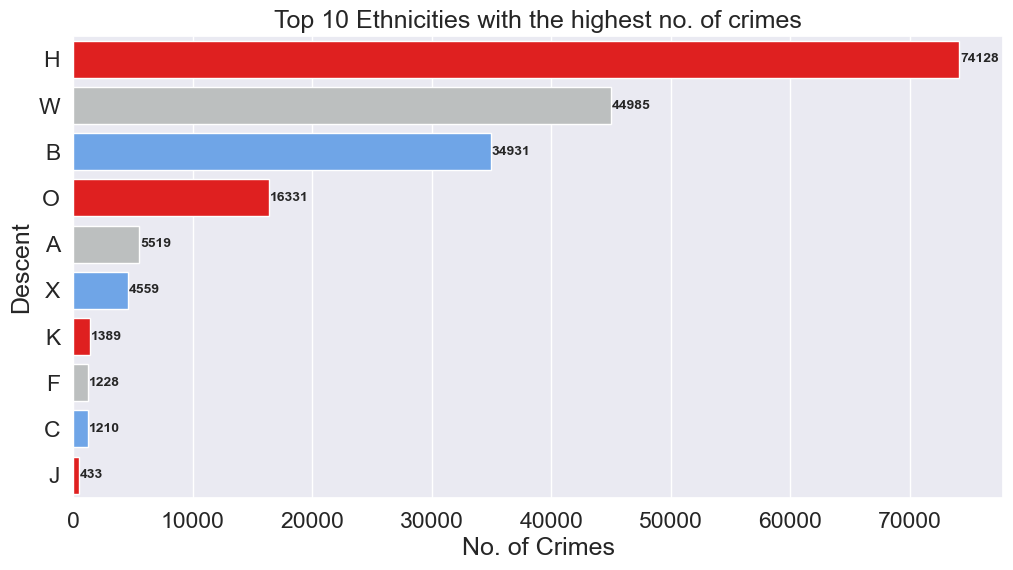

In [46]:
#plot for vict descent
plt.figure(figsize=(12,6))
sns.countplot(y="vict descent",data=df,order=top_10_descent_counts.index,palette=['#FF0000', '#bcbfbf', '#5ba3fb'])

for i,v in enumerate(top_10_descent_counts):
    plt.text(v + 100, i, s=str(v), va="center", fontsize=10, fontweight="bold")
    
plt.title("Top 10 Ethnicities with the highest no. of crimes")
plt.xlabel("No. of Crimes")
plt.ylabel("Descent")
plt.show()

### Insights
- The most common crimes are those committed against Hispanic/Latino people.
- Crimes against white and black people are also quite common.
- There are fewer crimes against Japanese people.

### Display the Top 3 Crime Statuses

In [47]:
#finding out the top 3 crime statuses
top_3_crime_status=df["crime status"].value_counts().nlargest(3)

print(f'Top 3 Crimes Statuses :\n{top_3_crime_status}')

Top 3 Crimes Statuses :
crime status
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Name: count, dtype: int64


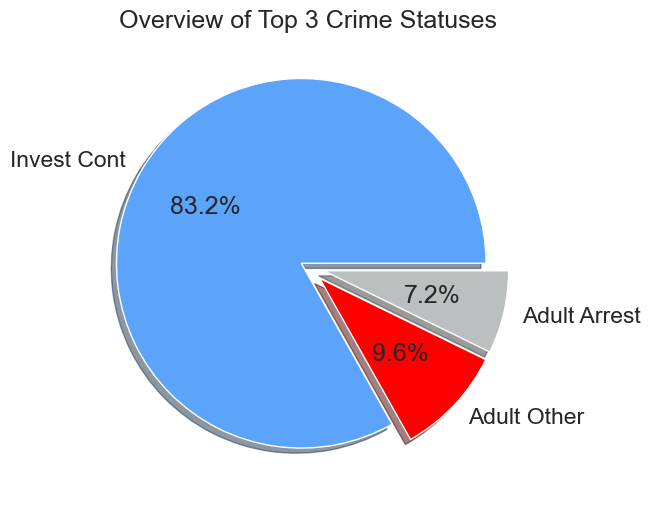

In [48]:
#plot for crime status
plt.figure(figsize=(6,6))
plt.pie(x=top_3_crime_status,labels=top_3_crime_status.index,autopct="%1.1f%%", labeldistance=1.1,shadow=True,explode=[0.04,0.09,0.09],colors=['#5ba3fb','#FF0000','#bcbfbf'])
plt.title('Overview of Top 3 Crime Statuses')
plt.show()

### Insights
- About 83.2% of crimes are still under investigation and have not yet been resolved.
- In about 9.6% of the crimes, adults were not arrested, and an alternative measure was used.
- Only 7.2% of adults were arrested for the crimes.

### What are the total number of crimes committed per month?

In [49]:
# Calculate the sum of crimes per month
monthly_crime_counts = df['date reported'].value_counts().resample('M').sum()

print(f'Total no. of crimes per month :\n{monthly_crime_counts.sort_values(ascending=False)}')

Total no. of crimes per month :
date reported
2022-08-31    15130
2022-12-31    15084
2022-06-30    14946
2022-10-31    14868
2023-01-31    14597
2022-07-31    14448
2022-09-30    14277
2023-03-31    13763
2023-02-28    13710
2023-05-31    13687
2022-11-30    13673
2023-06-30    13355
2023-04-30    13278
2023-07-31      899
Name: count, dtype: int64


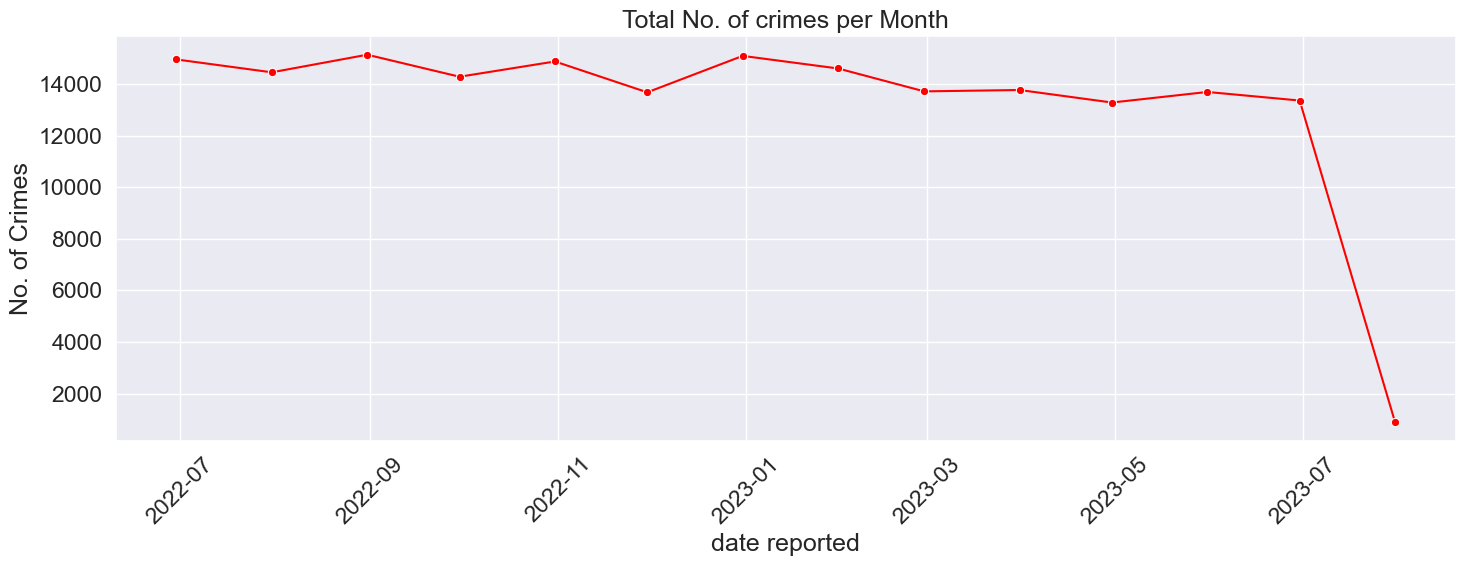

In [50]:
# Plotting the total no. of crimes on monthly basis
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values, marker='o',color='#FF0000')

plt.title('Total No. of crimes per Month')
plt.ylabel('No. of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights
- The highest number of crimes reported were on Aug 2022 followed closely by Dec 2022.
- The month with the lowest crime frequency is July 2023.

### What are the average number of crimes per year ?

In [51]:
# Calculate the mean of crimes per year
yearly_crime_counts = df['date reported'].value_counts().resample('Y').mean()

print(f'Average no. of Crimes per Year :\n{yearly_crime_counts}')

Average no. of Crimes per Year :
date reported
2022-12-31    478.626168
2023-12-31    452.657609
Freq: A-DEC, Name: count, dtype: float64


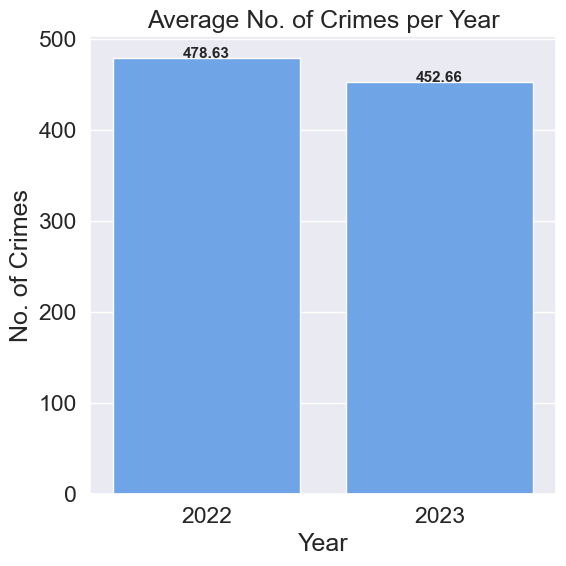

In [52]:
# Plotting the average no. of crimes on yearly basis
plt.figure(figsize=(6, 6))
sns.barplot(x=yearly_crime_counts.index.year, y=yearly_crime_counts.values, color='#5ba3fb')

for i,v in enumerate(yearly_crime_counts):
    plt.text(i,v,s=f"{v:.2f}",ha="center",fontsize=11,fontweight="bold")

plt.title('Average No. of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('No. of Crimes')
plt.tight_layout()
plt.show()

### Insights
- The average number of crimes reported in 2022 was higher than in 2023.
- There is a decrease in the no. of crimes reported from 2022 to 2023 .